In [33]:
import numpy as np
from scipy.stats import f_oneway
from matplotlib import pyplot as plt

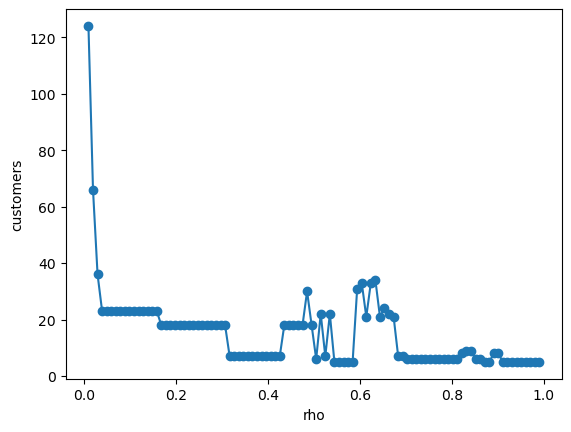

In [47]:
sig_cust = []
sig_rho = []

for rho in np.linspace(0.01, 0.99, 100):
    for customers in range(1, 130, 1):
        W1 = simulate_MMn(customers, rho, 1, 1, 42)
        W2 = simulate_MMn(customers, rho, 1, 2, 42)
        W4 = simulate_MMn(customers, rho, 1, 4, 42)
        _, p = f_oneway(W1, W2, W4)
        if p < 0.05:
            sig_rho.append(rho)
            sig_cust.append(customers)
            break


#plt.plot(sig_rho[:5] + sig_rho[6:], sig_cust[0:5] + sig_cust[6:])
plt.plot(sig_rho, sig_cust)
plt.scatter(sig_rho, sig_cust)
plt.xlabel('rho')
plt.ylabel('customers')
plt.show()